In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
df = pd.read_csv("/content/Salary Data (1).csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.dropna(inplace=True)

In [4]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
numerical_features = ["Age", "Years of Experience"]
categorical_features = ["Gender", "Education Level", "Job Title"]

In [15]:
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [18]:
label_encoder = LabelEncoder()
for feature in categorical_features:
    X[feature] = label_encoder.fit_transform(X[feature])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

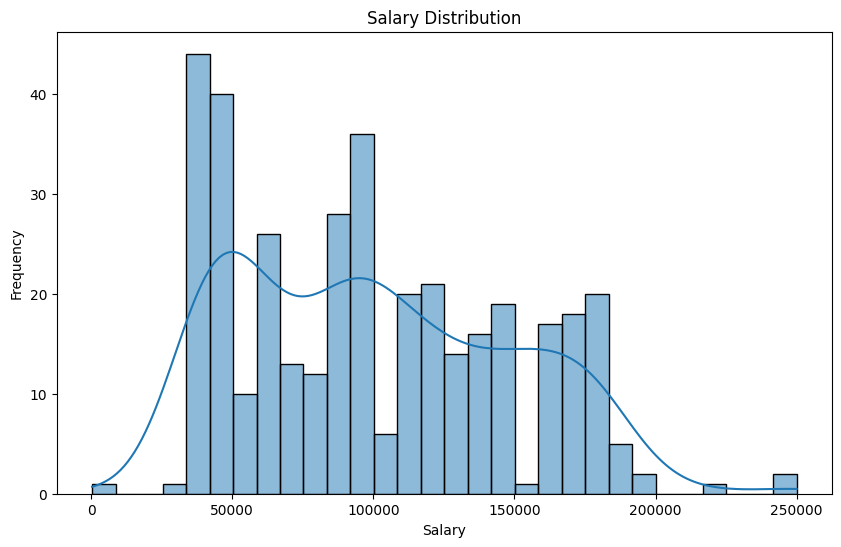

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

<ipython-input-22-7168ab59a1cd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


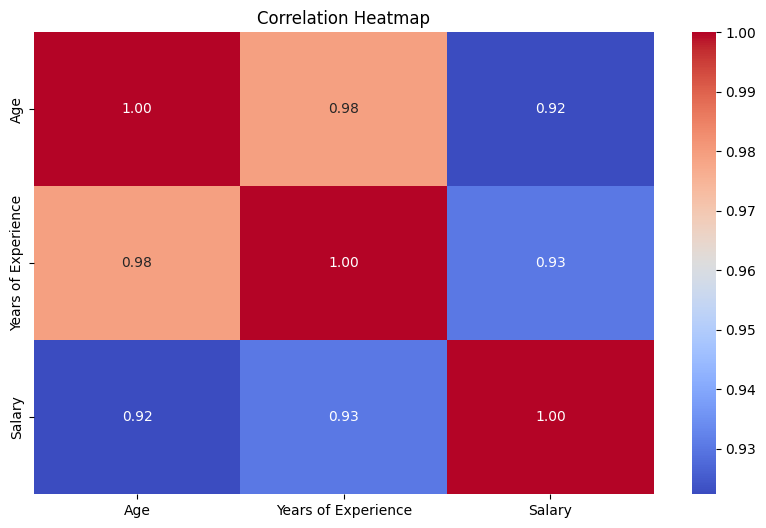

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [23]:
model = RandomForestRegressor(random_state=42)

In [24]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
y_pred = model.predict(X_test)

In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 8472.791
Mean Squared Error: 142945355.423075
R-squared: 0.9403793729790902


In [31]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

# Dictionary to store evaluation results
evaluation_results = {}

for model_name, model in models.items():
    # Fit the model on training data
    model.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store evaluation results
    evaluation_results[model_name] = {'MAE': mae, 'MSE': mse, 'R-squared': r2}

# Display evaluation results
for model_name, results in evaluation_results.items():
    print(f"Model: {model_name}")
    print(f"  Mean Absolute Error: {results['MAE']}")
    print(f"  Mean Squared Error: {results['MSE']}")
    print(f"  R-squared: {results['R-squared']}")
    print()

Model: Linear Regression
  Mean Absolute Error: 10928.921486231378
  Mean Squared Error: 249075656.42722052
  R-squared: 0.8961138207821868

Model: Random Forest
  Mean Absolute Error: 8472.791
  Mean Squared Error: 142945355.423075
  R-squared: 0.9403793729790902

Model: Gradient Boosting
  Mean Absolute Error: 8976.364370866091
  Mean Squared Error: 176284843.08276752
  R-squared: 0.9264739113224755

Model: SVR
  Mean Absolute Error: 40528.19470385806
  Mean Squared Error: 2453360279.8585987
  R-squared: -0.023264293970564287

Model: KNN
  Mean Absolute Error: 15840.933333333332
  Mean Squared Error: 674297132.0
  R-squared: 0.7187595379419267

